# Đồ án thực hành Nhập môn Khoa học Dữ liệu

### Thành viên:
- 20120632: Trần Thái Vỹ
- 20120409: Trần Thanh Tùng
- 21120531: Nguyễn Văn Phúc



## **Mô tả đồ án:**
- Cào dữ liệu lấy thông tin của 10000 anime trên web. Thời điểm cào bắt đầu từ lúc cào dữ liệu trên đây.
- Từ dữ liệu thu thập được tiến hành phân tích, khám phá, xử lý và đưa ra mô hình phù hợp cho dữ liệu.

#### **Thời gian kết thúc đồ án:** ~7/01/2024
#### **Thời gian vấn đáp:** ~5/1/2024
#### **Nguồn của dữ liệu:**  [myanimelist.net](https://myanimelist.net)

## Import thư viện

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import datetime
import warnings
warnings.simplefilter('ignore')
sns.set_theme()

Thư viện pandas: đọc, ghi dữ liệu và thực hiện các xử lý dữ liệu trên dataframe.\
Thư viện mathplotlib: trực quan hóa dữ liệu.\
Thư viện numpy: làm việc với toán học một cách dễ dàng.\
Thư viện seaborn : Hỗ trợ trực quan hoá.

---

## Thu thập dữ liệu

### Thông tin về dữ liệu

- Dữ liệu được sử dụng trong đồ án là tập dữ liệu về các **bộ anime** với những thông tin được lưu trữ liên quan tới những yếu tố được quan tâm với một bộ phim hoạt hình.
- Tập dữ liệu được cào và download trực tiếp thông qua [đường dẫn](https://myanimelist.net/anime.php).

### Dữ liệu được thu thập thế nào ?

- Nhóm tiến hành crawl dữ liệu với thư viện scrapy.
- Ở đây nhóm không crawl hết toàn bộ các anime mà chỉ crawl 10000 bộ nổi nhất được sắp xếp trên web.

---

## Khám phá dữ liệu

### Đọc dữ liệu từ file json vào dataframe

Dữ liệu sau khi thu thập được lưu duy nhất trong 1 file JSON duy nhất là dataset/animes_info.json

In [3]:
df = pd.read_json('./anime_crawler/anime_crawler/dataset/animes_info.json')

In [4]:
df.head()

,Name,Score,Rank,Type,Episodes,Aired,Premiered,Producers,Studios,Genres,Popularity,Members,Favorites
0,Fullmetal Alchemist: Brotherhood,9.11,1,TV,64,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,"[Mainichi Broadcasting System, Studio Moriken,...",[Bones],"[Adventure, Drama, Fantasy, Action]",#3,"3,037,641","211,082"
1,Bleach: Sennen Kessen-hen,9.10,2,TV,13,"Oct 11, 2022 to Dec 27, 2022",Fall 2022,"[TV Tokyo, Shueisha, Dentsu, Aniplex]",[Pierrot],"[Adventure, Fantasy, Action]",#669,"310,979","11,798"
2,Kaguya-sama wa Kokurasetai: Ultra Romantic,9.09,3,TV,13,"Apr 9, 2022 to Jun 25, 2022",Spring 2022,"[JR East Marketing & Communications, Mainichi ...",[A-1 Pictures],"[Comedy, Romance]",#238,"703,336","25,895"
3,Steins;Gate,9.08,4,TV,24,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,"[Movic, AT-X, Nitroplus, Kadokawa Pictures Jap...",[White Fox],"[Drama, Sci-Fi, Suspense]",#13,"2,338,343","177,381"
4,Gintama°,9.07,5,TV,51,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,"[TV Tokyo, Dentsu, Aniplex]",[Bandai Namco Pictures],"[Sci-Fi, Comedy, Action]",#337,"567,213","15,323"


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

Tiến hành tính số dòng và số cột rồi lưu vào 2 biến `num_rows` và `num_cols`.

In [5]:
num_rows = len(df.axes[0])
num_cols = len(df.axes[1])

In [6]:
print('Số dòng: {}'.format(num_rows))
print('Số cột: {}'.format(num_cols))

Số dòng: 10000
Số cột: 13


**Nhận xét:**
* Tập dữ liệu gồm 10000 dòng và 13 cột.
* Ngoài ra, theo thông tin của bộ dữ liệu, dữ liệu được khảo sát ngay từ lúc bắt đầu cào dữ liệu từ web nên đảm bảo tính tức thời, tuy nhiên có một điểm bất lợi được chỉ ra là ta không thể so sánh các số liệu theo các thời gian cào khác nhau.

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

- Theo quan sát, mỗi dòng là thông tin của một bộ anime với các trường dữ liệu giống nhau nhưng nội dung là riêng biệt.
- Các dòng không có ý nghĩa khác nhau
- Mỗi dòng là một đặc tả khác biệt về một bộ phim nhất định với cái nhìn khách quan nhất cho người xem.

### Dữ liệu các dòng có bị lặp không?

Tiến hành kiểm tra bằng cách lưu kết quả vào biến `have_duplicated_rows`. Biến có giá trị True nếu dữ liệu có các dòng bị lặp và False nếu ngược lại.

In [7]:
have_duplicated_rows=df.Name.duplicated().any()
if have_duplicated_rows:
    print('Các dòng dữ liệu bị lặp')
else:
    print('Các dòng dữ liệu không bị lặp')

Các dòng dữ liệu không bị lặp


### Mỗi cột có ý nghĩa gì?

Mô tả ý nghĩa các cột có trong `df`:
- **Name**: Tên anime
- **Score**: Số điểm trung bình được đánh giá bởi cộng đồng người dùng của anime đó
- **Rank**: Thứ hạng của anime
- **Type**: Loại anime (TV, Movie, OVA, ONA, Special, Music)
- **Episodes**: Số tập hiện có
- **Aired**: Thời gian phát sóng
- **Premiered**: Mùa ra mắt
- **Producers**: Các nhà sản xuất
- **Studios**: Các studio
- **Genres**: Thể loại anime
- **Popularity**: Xếp hạng độ phổ biến
- **Members**: Số lượng người dùng đã thêm anime vào danh sách anime của họ
- **Favorites**: Số lượng người dùng đã thêm anime vào danh sách yêu thích của họ

### Mỗi cột hiện đang có kiểu dữ liệu gì? Khoảng biểu diễn của kiểu dữ liệu đó ra sao? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

Tiến hành lấy `dtype` của mỗi cột và lưu kết quả vào col_dtypes.

In [ ]:
col_dtypes = df.dtypes
col_dtypes

Name           object
Score         float64
Rank            int64
Type           object
Episodes       object
Aired          object
Premiered      object
Producers      object
Studios        object
Genres         object
Popularity     object
Members        object
Favorites      object
dtype: object

Khoảng biểu diễn của kiểu dữ liệu từng cột:
- **Name**: object
- **Score**: [np.float64, np.float32]
- **Rank**: [np.int64, np.int32]
- **Type**: object
- **Episodes**: object
- **Aired**: object
- **Premiered**: object
- **Producers**: object
- **Studios**: object
- **Genres**: object
- **Popularity**: object
- **Members**: object
- **Favorites**: object

Các cột có kiểu dữ liệu chưa phù hợp và các vấn đề cần xử lý:
- Cột `Episode` có kiểu dữ liệu object, chứa số tập, một số dòng có giá trị "Unknown". Cần chuyển sang kiểu int để dễ thao tác
- Cột `Aired` có kiểu dữ liệu object, chứa thông tin thời gian phát sóng, có dạng "**Ngày bắt đầu** to **Ngày kết thúc**, trong đó **Ngày bắt đầu** được viết dưới dạng *%b %-d, %Y*, **Ngày kết thúc** có thể viết dưới dạng như **Ngày bắt đầu** hoặc có thể là dấu "?" thể hiện cho việc anime chưa kết thúc. Ngoài ra, một số anime thể loại đặc biệt như movie, OVA, ONA, Special, Music thì *thường* không có ngày kết thúc mà chỉ có ngày bắt đầu.
- Cột `Popularites`, `Members`, `Favorites` có kiểu dữ liệu object, cần chuyển sang kiểu int

## Tiền xử lý

### Tiến hành để đưa các cột về kiểu dữ liệu phù hợp

Ta tiến hành tiền xử lý các cột trên như sau:
- Ở cột `Episodes`, ta chuyển các giá trị "Unknown" thành NaN và các giá trị khác thành kiểu int
- Ở cột `Aired`, ta tách thành 2 cột là `From` và `To` lần lượt biểu diễn **Ngày bắt đầu** và **Ngày kết thúc**. Ở cột `From`, ta để kiểu dữ liệu datetime, còn ở cột `To`, ta để kiểu dữ liệu datetime đối với các anime có **Ngày kết thúc**, những anime chỉ có **Ngày bắt đầu** hoặc **Ngày kết thúc** có dạng "?" thì ta để giá trị NaN. Đặc biệt những bộ anime chỉ có 1 tập thì **Ngày bắt đầu** cũng là ngày **Ngày kết thúc**.
- Ở cột `Popularity`, ta loại bỏ dấu "#" ở đầu và chuyển nó về kiểu dữ liệu int
- Lần lượt chuyển 2 cột `Members` và `Favorites` về kiểu dữ liệu int (loại bỏ dấu ",")

In [ ]:

df['Episodes'].replace(to_replace="Unknown",value=np.nan,inplace=True)
# df['Episodes']=df['Episodes'].astype(int,errors='ignore')
df['Episodes'] = df['Episodes'].astype('Int64')

df['Aired']=df['Aired'].astype(str)
df['From']=df['Aired'].transform(lambda x: x.split(' to ')[0])
df['To']=df['Aired'].transform(
    lambda x:x.split(' to ')[1] if len(x.split(' to ')) == 2 and x.split(' to ')[1]!= '?' else np.nan)
df.drop(columns=['Aired'],inplace=True)
df['From']=df['From'].transform(lambda x: np.nan if x=="Not available" else x)
df['From']=pd.to_datetime(df['From'],infer_datetime_format=True)
df['To']=pd.to_datetime(df['To'],infer_datetime_format=True)
df['To'] = np.where((df['Episodes'].notna()) & (df['Episodes'] == 1) & (df['To'].isna()),df['From'], df['To'])

df['Premiered'].replace("?",np.nan,inplace=True)
df['Premiered']=df['Premiered'].transform(lambda x: re.findall("[a-zA-Z]+",x)[0] if x is not np.nan else x)

df['Popularity']=df['Popularity'].transform(lambda x: int(x.replace("#","")))

df['Members']=df['Members'].transform(lambda x: int(x.replace(",","")))
df['Favorites']=df['Favorites'].transform(lambda x: int(x.replace(",","")))

In [ ]:
df.dtypes

Name                  object
Score                float64
Rank                   int64
Type                  object
Episodes               Int64
Premiered             object
Producers             object
Studios               object
Genres                object
Popularity             int64
Members                int64
Favorites              int64
From          datetime64[ns]
To            datetime64[ns]
dtype: object

## Khám phá dữ liệu (tiếp tục)

### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

Ta nhận thấy các cột có giá trị **numeric** là:
Score, 
Rank, 
Episodes, 
From, 
To, 
Popularity, 
Members, 
Favorites\
Chia làm 2 loại:
- Số thông thường có thể tính toán (float64, int64): Score, Rank, Episodes, Popularity, Members, Favorites
- Ngày ( datetime64[ns]): From, To

Với mỗi cột với dtypes là  ***'***datetime64[ns]***'***, ta tiến hành tính tỉ lệ % giá trị thiếu (từ 0 đến 100), min, max. Sau đó lưu kết quả vào dataframe `nume_col_profiles_df`. Dataframe này có 3 dòng là "missing_ratio", "min", "max"; và có các cột là các cột numeric.

In [ ]:
nume_col_df_1 = df.loc[:,["From","To"]]
missing_ratio = pd.DataFrame(nume_col_df_1.isnull().sum()*100/len(nume_col_df_1),columns=['missing_ratio'])
min = pd.DataFrame(pd.Series({'From':nume_col_df_1.loc[:,'From'].min(),'To':nume_col_df_1.loc[:,'To'].min()}),columns=['min'])
max = pd.DataFrame(pd.Series({'From':nume_col_df_1.loc[:,'From'].max(),'To':nume_col_df_1.loc[:,'To'].max()}),columns=['max'])
nume_col_profiles_df = pd.concat([missing_ratio, min,max],axis=1)
nume_col_profiles_df

,missing_ratio,min,max
From,0.04,1917-02-01,2022-12-08
To,4.29,1917-02-01,2023-01-08


Với mỗi cột với dtypes là  ***'***float64, int64***'***, tính kết quả được vào Data Frame `nume_col_df_2`, là "missing_ratio", "count", "mean", "std", "min", "25%", "50%", "75%", "max";

In [ ]:
nume_col_df_2 =  df.loc[:,['Score','Rank','Episodes','Popularity','Members','Favorites']]
def missing_ratio(s):
    return s.isna().mean() * 100
missing_df = nume_col_df_2.agg([missing_ratio])
nume_col_df = pd.concat([missing_df,nume_col_df_2.describe()])
nume_col_df

,Score,Rank,Episodes,Popularity,Members,Favorites
missing_ratio,0.000000,0.000000,0.51,0.00000,0.000000e+00,0.00000
count,10000.000000,10000.000000,9949.0,10000.00000,1.000000e+04,10000.00000
mean,6.865628,5000.501300,14.359634,6310.71830,8.269937e+04,1003.94020
std,0.648243,2886.894709,47.566261,4324.82702,2.259088e+05,6549.66395
min,5.860000,1.000000,1.0,1.00000,1.700000e+02,0.00000
25%,6.340000,2500.750000,1.0,2604.75000,2.479000e+03,3.00000
50%,6.780000,5000.500000,5.0,5615.50000,1.079300e+04,17.00000
75%,7.300000,7500.250000,13.0,9657.75000,5.594475e+04,150.00000
max,9.110000,10000.000000,3057.0,18426.00000,3.583787e+06,211082.00000


***Nhận xét:*** Với sự phân bố ở trê của các cột dữ liệu có dạng numeric, ta có thể đánh giá về dữ liệu là có tốt hay không bằng việc quan sát và đưa ra kết luận phù hợp cho bước tiền xử lí tiếp theo

### Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?

**Các cột có giá trị categorical:**\
Type, Premiered, Producers, Studios, và Genres\
Ở đây ta không xét tới cột Name vì các giá trị của cột này đều là duy nhất.

Với mỗi cột categorical, ta tiến hành tính:
- Tỉ lệ % giá trị thiếu (từ 0 đến 100)
- Số lượng giá trị khác nhau (không xét giá trị thiếu), 3 cột Producers, Studios, và Genres chứa thông tin ở dạng list nên việc đếm các giá trị không có ý nghĩa mấy vì số lượng tổ hợp khá nhiều, nên ta sẽ đếm số lượng các phần tử có trong list
- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu): sử dụng dictionary với key là giá trị, value là tỉ lệ %\
Sau đó lưu kết quả vào dataframe `cate_col_profiles_df`. Dataframe này có 3 dòng là "missing_ratio", "num_vals", "vals_ratios"; và có các cột là các cột categorical

In [ ]:
cate_col_df = df[["Type","Premiered", "Producers", "Studios", "Genres"]].copy()
missing_ratio = cate_col_df.isnull().sum() * 100 / len(cate_col_df)
cate_col_df[["Producers", "Studios", "Genres"]] = cate_col_df[["Producers", "Studios", "Genres"]].apply(lambda x: x.explode(ignore_index=True))
num_values = cate_col_df.nunique()
value_ratios = cate_col_df.apply(lambda x: dict(x.value_counts(normalize = True).mul(100).round(1)))


r_name = ["missing_ratio", "num_vals", "value_ratios"]

cate_col_profiles_df = pd.DataFrame([missing_ratio,num_values,pd.Series(value_ratios,index=["Type","Premiered", "Producers", "Studios", "Genres"])],index=r_name)
cate_col_profiles_df

,Type,Premiered,Producers,Studios,Genres
missing_ratio,0.0,61.1,0.0,0.0,7.64
num_vals,7,4,692,557,19
value_ratios,"{'TV': 39.1, 'Movie': 16.2, 'Special': 15.1, '...","{'Spring': 32.5, 'Fall': 30.2, 'Winter': 19.9,...","{'None found, ': 7.8, 'add some': 7.8, 'Aniple...","{'add some': 7.8, 'None found, ': 7.8, 'Toei A...","{'Comedy': 16.5, 'Action': 14.8, 'Drama': 10.4..."


**Nhận xét:**
 - Các cột {Type, Producers, Studios,Genres} đều không có giá trị thiếu. Riêng về cột {Premiered và Genres} vẫn có thiếu. 
 - Hoàn toàn phù hợp vì các trường thiếu dữ kiện là không quá cần thiết cho một bộ phim.

---

## Đặt câu hỏi có ý nghĩa cần trả lời

### Câu hỏi 1: Các Studio nào hiện đang chiếm ưu thế về mặt chất lượng cũng như số lượng người xem

Hiện tại không thể phủ định chất lượng của những bộ phim được sản xuất ra cùng một 'lò' với chất lượng ngang nhau và tư duy sáng tạo khác biệt với mặt bằng chung, vậy nên việc người xem có thể lựa chọn về phía studio nào là một trong những vấn đề đáng nhắc đến của những người 'nghiện' thể loại hoạt hình anime.

In [ ]:
df1=df[['Score','Studios','Members']].copy()
df1=df1.Studios.apply(pd.Series).merge(df1,right_index=True,left_index=True)
df1=df1.melt(id_vars=['Score','Members','Studios'],value_name="Studio")
df1=df1.drop(["variable","Studios"],axis=1).dropna()
df1=df1.groupby(['Studio'])[['Score','Members']].mean().reset_index()
df1

,Studio,Score,Members
0,10Gauge,6.784000,3053.400000
1,2:10 AM Animation,6.784000,2965.000000
2,5 Inc.,6.380000,5531.000000
3,7doc,6.385000,717.500000
4,8bit,7.164231,181995.557692
...,...,...,...
611,production doA,7.080000,70614.250000
612,studio MOTHER,7.084000,97721.000000
613,team Yamahitsuji,7.230000,106246.000000
614,teamKG,6.170000,34867.333333


In [ ]:
df1['Studio'].describe()

count         616
unique        616
top       10Gauge
freq            1
Name: Studio, dtype: object

In [ ]:
df1['Score'].describe()

count    616.000000
mean       6.704220
std        0.457654
min        5.870000
25%        6.370000
50%        6.676910
75%        7.015312
max        8.403333
Name: Score, dtype: float64

Ở đây chúng ta điểm danh 616 studio được ghi nhận trong bảng dữ liệu với 2 chỉ số là số lượng (được đánh giá qua lượng người xem) và chất lượng (được đánh giá qua điểm số trung bình được người xem bình chọn trong từng bộ phim của studio đó).\
Nhìn chung thì điểm số của các studio dao động trong khoảng  5.87-8.4 tương đối là cao nhưng vẫn có độ chênh lệch nhất định.

### Biểu đồ thể hiện mật độ điểm số trung bình của các studio

<AxesSubplot: xlabel='Score', ylabel='Count'>

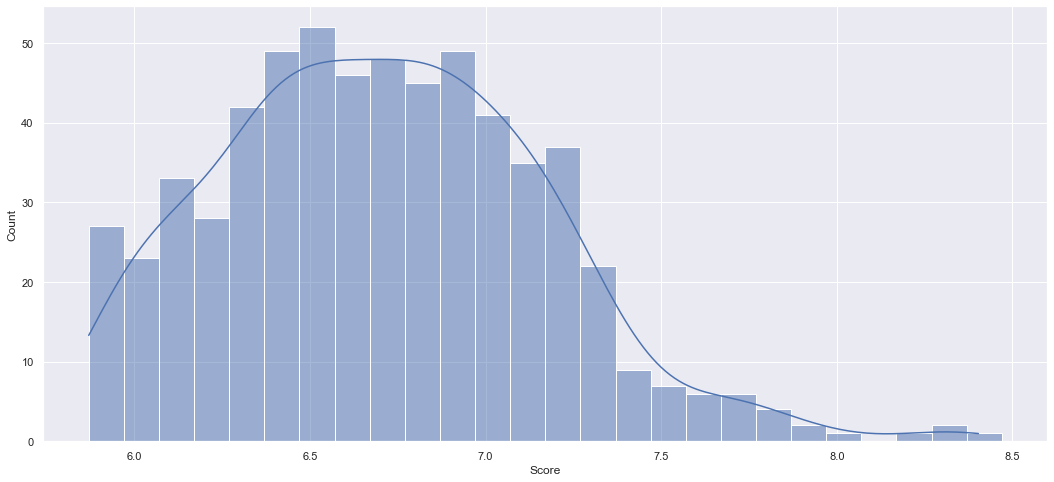

In [ ]:
plt.subplots(figsize=(18,8))
sns.histplot(data=df1,x="Score",kde=True,binwidth=0.1)

***Nhận xét***
Mật độ studio tập trung nhiều ở múc điểm 6.3~7.0, điểm được đánh giá là khá cao vì không dưới trung bình, vẫn xuất hiện những studio được đánh giá với điểm trung bình cao (lên tới 8.3, 8.4, 8.5) nhưng không nhiều cho thấy các studio duy trì được phong độ ở các bộ phim là không cao tuy nhiên vẫn được chào đón.

In [ ]:
# Top 5 Score
top=5
df1.sort_values(by=['Score'],ascending=False,ignore_index=True)[:top][['Studio','Score']]

,Studio,Score
0,K-Factory,8.403333
1,Studio Bind,8.346667
2,Egg Firm,8.292500
3,Nippon Ramayana Film Co.,8.250000
4,Studio Signpost,8.053333


In [ ]:
# Top 5 Score
top=5
df1.sort_values(by=['Members'],ascending=True,ignore_index=True)[:top][['Studio','Members']]

,Studio,Members
0,Trash Studio,241.000000
1,Pops Inc.,293.000000
2,Studio Gohan,313.777778
3,Animation Lab Japan,326.000000
4,Gyorai Eizo Inc.,347.000000


In [ ]:
# Tinh tuong quan theo % cua 2 cot Score va Members
# Final-Score = %Score  + %Members
df1['Final-Score'] = df1['Score']/df1['Score'].sum()+df1['Members']/df1['Members'].sum()
df1.sort_values(by=['Final-Score'], ascending=False,
                ignore_index=True, inplace=True)
df1.head(10)

,Studio,Score,Members,Final-Score
0,Studio Bind,8.346667,613023.333333,0.024748
1,Egg Firm,8.292500,485864.250000,0.020021
2,White Fox,7.328605,397112.209302,0.016497
3,Studio Chizu,7.917500,351697.500000,0.014956
4,Wit Studio,7.426393,354050.557377,0.014924
5,MAPPA,7.321803,305373.967213,0.013094
6,Bones,7.346276,299298.572414,0.012875
7,CloverWorks,7.382326,290409.302326,0.012554
8,Trigger,7.202800,291343.680000,0.012545
9,AIC Build,7.017778,290722.888889,0.012478


#### Biểu đồ thể hiện Top 10 studios có điểm và độ nổi tiếng cao

<AxesSubplot: xlabel='Studio', ylabel='Members'>

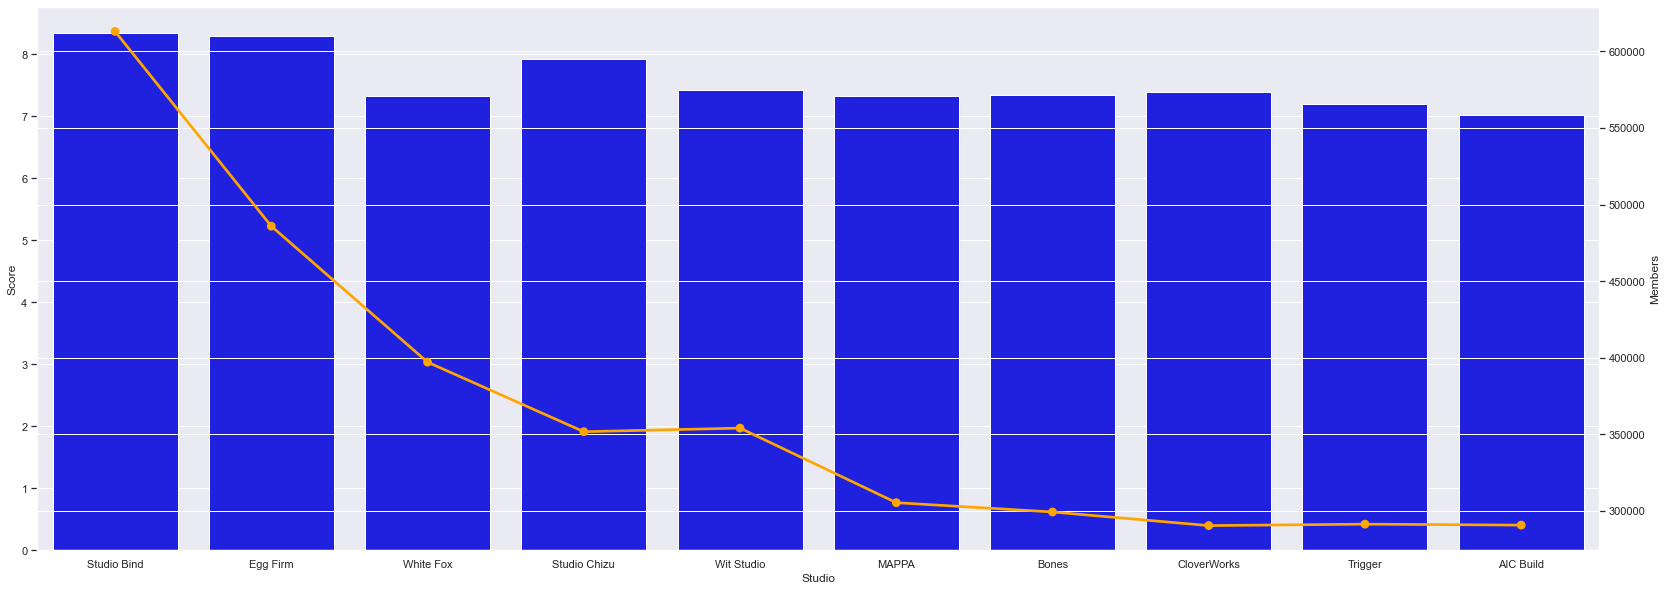

In [ ]:
# Top 10 studios có điểm và độ nổi tiếng cao
show_amount=10
fig,axis=plt.subplots(figsize=(28,10))
sns.barplot(
    data=df1[:show_amount],
x="Studio",y="Score",color="blue",
ax=axis)
axis2=axis.twinx()
sns.pointplot(data=df1[:show_amount],
            x="Studio",
            y="Members",
            color='orange',
            ax=axis2)

***Nhận xét:***
Từ câu hỏi này giúp người xem có được đánh giá về việc lựa chọn 1 studio phim anime đứng top và có được những trải nghiệm tốt nhất.

### Câu hỏi 2: Tương quan rating với số lượng người xem. Có phải phim nhiều người xem thì rating cao không ?

***Ý nghĩa câu hỏi:*** Câu hỏi này đặt ra nhằm xác nhận lại chiều hướng suy nghĩ phổ thông của đại đa số người khi cho răng những phim được nhiều người xem luôn là những phim thu hút các lượt đánh giá với điểm số cao, và ngược lại những bộ phim có lượt xem ít ỏi hay thu về những đánh giá dở tệ:
- Điều này cũng xác minh thêm về việc liệu rằng người xem có đang đánh giá đúng về tiêu chuẩn của một bộ phim truyền hình và nên đánh đồng hiệu ứng tỉ lệ thuận giữa lượt xem và đánh giá. 
- Tránh trường hợp người xem đã có quan điểm không tốt về một bộ phim và mới chỉ mới lượt đánh giá ít ỏi mà quyết định không xem.

Đầu tiên ta lấy ra các đặc trưng "Score", "Members", "From" và lưu vào `sco_mem_df`

In [ ]:
sco_mem_df = df[["Score", "Members", "From"]].copy().dropna()
sco_mem_df

,Score,Members,From
0,9.11,3037641,2009-04-05
1,9.10,310979,2022-10-11
2,9.09,703336,2022-04-09
3,9.08,2338343,2011-04-06
4,9.07,567213,2015-04-08
...,...,...,...
9995,5.86,758,2012-11-01
9996,5.86,16518,2015-07-23
9997,5.86,354,1992-09-05
9998,5.86,7270,2019-10-03


Vì lượng người xem có xu hướng tăng dần theo thời gian nên ta chỉ xét số lượng người xem trung bình từng năm (để tính được, ta lấy số lượng người xem hiện tại chia cho số năm kể từ lúc anime được ra mắt)

In [ ]:
current_year = datetime.datetime.now().year
sco_mem_df['FromYear'] = pd.DatetimeIndex(sco_mem_df['From']).year
def ave_mem(row):
    if current_year == row["FromYear"]:
        ave = row["Members"]
    else:
        ave = row["Members"]/(current_year-row["FromYear"])
    return int(ave)
sco_mem_df["AverageMembers"] = sco_mem_df.apply(ave_mem, axis = 1)
sco_mem_df

,Score,Members,From,FromYear,AverageMembers
0,9.11,3037641,2009-04-05,2009,233664
1,9.10,310979,2022-10-11,2022,310979
2,9.09,703336,2022-04-09,2022,703336
3,9.08,2338343,2011-04-06,2011,212576
4,9.07,567213,2015-04-08,2015,81030
...,...,...,...,...,...
9995,5.86,758,2012-11-01,2012,75
9996,5.86,16518,2015-07-23,2015,2359
9997,5.86,354,1992-09-05,1992,11
9998,5.86,7270,2019-10-03,2019,2423


Ta tính độ tương quan giữa 2 số điểm và lượng người xem trung bình

In [ ]:
sco_mem_df["Score"].corr(sco_mem_df["AverageMembers"])

0.3480820556404249

Nhìn chung độ tương quan có vẻ thấp, ta thử vẽ biểu đồ tương quan giữa hai đặc trưng trên xem.

<AxesSubplot: xlabel='Score', ylabel='AverageMembers'>

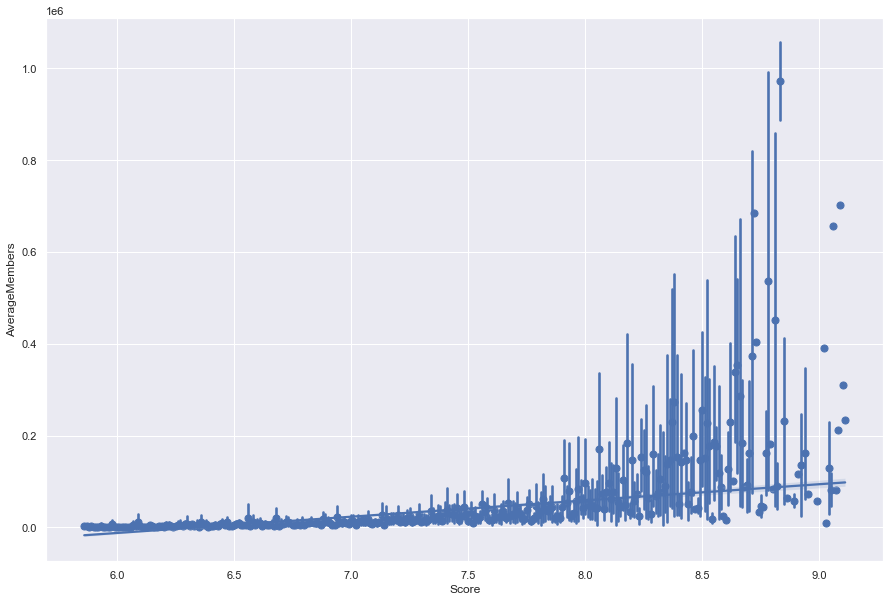

In [ ]:
plt.figure(figsize=(15, 10))
sns.regplot(x = "Score", y = "AverageMembers", data = sco_mem_df, x_estimator=np.mean)

Dựa vào độ tương quan đã tính và biểu đồ trên, ta có thể thấy điểm số phần nào có liên quan đến số lượng người xem.

### Câu hỏi 3: Xem xu hướng xem của người xem. Sự thay đổi về thể loại phim ưa thích của người xem ngày trước và bây giờ.

***Ý nghĩa khi trả lời câu hỏi:*** Trả lời được câu hỏi này, ta có thể được cái nhìn tổng quan về các thể loại được quan tâm trong ngành công nghiệp phim trong các năm gần đây thõa mãn các câu hỏi:
- Của nhà sản xuất phim: biết về định hướng tốt và xấu trong các thể loại (tìm hiểu lí do tại sao loại phim này không còn phổ biến và phân tích điểm mạnh của các thể loại phim phổ biến)
- Của nhà đầu tư phim: lựa chọn những bộ phim có thể loại thích hợp đem lại lợi nhuận để có thể mạnh dạn đem tiền làm cổ đông.
- Của người xem: họ có xu hướng xem theo đám đông vì đó là những thể loại được đánh giá cao nhất, nên họ có thể không lo lắng nhiều về chất lượng phim được công chiếu trong những năm đó dưới các thể loại đó.

In [ ]:
genres_df = df[["Genres", "Members", "From"]].copy()
genres_df = genres_df.dropna()
genres_df["FromYear"] = pd.DatetimeIndex(genres_df['From']).year
genres_df

,Genres,Members,From,FromYear
0,"[Adventure, Drama, Fantasy, Action]",3037641,2009-04-05,2009
1,"[Adventure, Fantasy, Action]",310979,2022-10-11,2022
2,"[Comedy, Romance]",703336,2022-04-09,2022
3,"[Drama, Sci-Fi, Suspense]",2338343,2011-04-06,2011
4,"[Sci-Fi, Comedy, Action]",567213,2015-04-08,2015
...,...,...,...,...
9994,"[Supernatural, Slice of Life]",680,2015-06-24,2015
9995,"[Drama, Suspense]",758,2012-11-01,2012
9996,"[Fantasy, Sci-Fi, Comedy, Romance, Action]",16518,2015-07-23,2015
9998,[Supernatural],7270,2019-10-03,2019


Chia các năm thành 3 giai đoạn:
- Trước năm 2000
- Từ 2000-2010
- Từ năm 2010 trở đi\
Sau đó đưa vào bảng

In [ ]:
#divide into 3 year ranges: <2000, 2000-2010, >2010
min_year = genres_df["FromYear"].min()
max_year = genres_df["FromYear"].max()
def year_range(x):
    if x>=2010:
        return (2010, max_year)
    if x>=2000:
        return (2000, 2010)
    if x<2000:
        return (min_year, 1999)
genres_df["YearRange"] = genres_df["FromYear"].apply(year_range)
genres_df

,Genres,Members,From,FromYear,YearRange
0,"[Adventure, Drama, Fantasy, Action]",3037641,2009-04-05,2009,"(2000, 2010)"
1,"[Adventure, Fantasy, Action]",310979,2022-10-11,2022,"(2010, 2022)"
2,"[Comedy, Romance]",703336,2022-04-09,2022,"(2010, 2022)"
3,"[Drama, Sci-Fi, Suspense]",2338343,2011-04-06,2011,"(2010, 2022)"
4,"[Sci-Fi, Comedy, Action]",567213,2015-04-08,2015,"(2010, 2022)"
...,...,...,...,...,...
9994,"[Supernatural, Slice of Life]",680,2015-06-24,2015,"(2010, 2022)"
9995,"[Drama, Suspense]",758,2012-11-01,2012,"(2010, 2022)"
9996,"[Fantasy, Sci-Fi, Comedy, Romance, Action]",16518,2015-07-23,2015,"(2010, 2022)"
9998,[Supernatural],7270,2019-10-03,2019,"(2010, 2022)"


Ta tính lượng người xem trung bình của từng thể loại theo từng giai đoạn.

In [ ]:
genres_df = genres_df.Genres.apply(pd.Series).merge(genres_df, right_index=True, left_index=True)
genres_df = genres_df.melt(id_vars=['Genres','Members','From','FromYear','YearRange'], value_name="Genres_split")
genres_df = genres_df.drop(['Genres','From', 'FromYear','variable'], axis=1).dropna()
genres_df=genres_df.groupby(['YearRange','Genres_split'])['Members'].mean()
genres_df=genres_df.unstack(level=0)
genres_df

YearRange,"(1917, 1999)","(2000, 2010)","(2010, 2022)"
Genres_split,,,
Action,34728.010340,108176.952045,156729.391991
Adventure,29864.451985,77564.376396,124798.624250
Avant Garde,269407.666667,118644.705882,55567.658537
Award Winning,197773.272727,240550.487805,390224.555556
Boys Love,10755.545455,52115.095238,67752.034483
Comedy,23666.766839,54747.992599,105720.296209
Drama,33732.610672,93287.856655,177143.376370
Ecchi,17740.471698,73349.145729,179311.064690
Fantasy,39001.769401,86142.599297,136156.832045


Xem xét lại các thể loại phim

In [ ]:
genres_df.index.unique()

Index(['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love',
       'Comedy', 'Drama', 'Ecchi', 'Fantasy', 'Girls Love', 'Gourmet',
       'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports',
       'Supernatural', 'Suspense'],
      dtype='object', name='Genres_split')

*Nhận xét*
(Loại bỏ: Award winning, Avant Garde)

Đây là 2 thể loại không cần thiết để đưa vào danh sách xem xét vì:
- Award winning: các bộ phim đạt giải
- Avant Garde: các bộ phm tiên phong (cho các thể loại phim mới)
Khác với những thể loại rõ ràng tường minh

In [ ]:
genres_df.drop(['Avant Garde', 'Award Winning'],inplace=True)

Trực quan hóa bằng biểu đồ cột

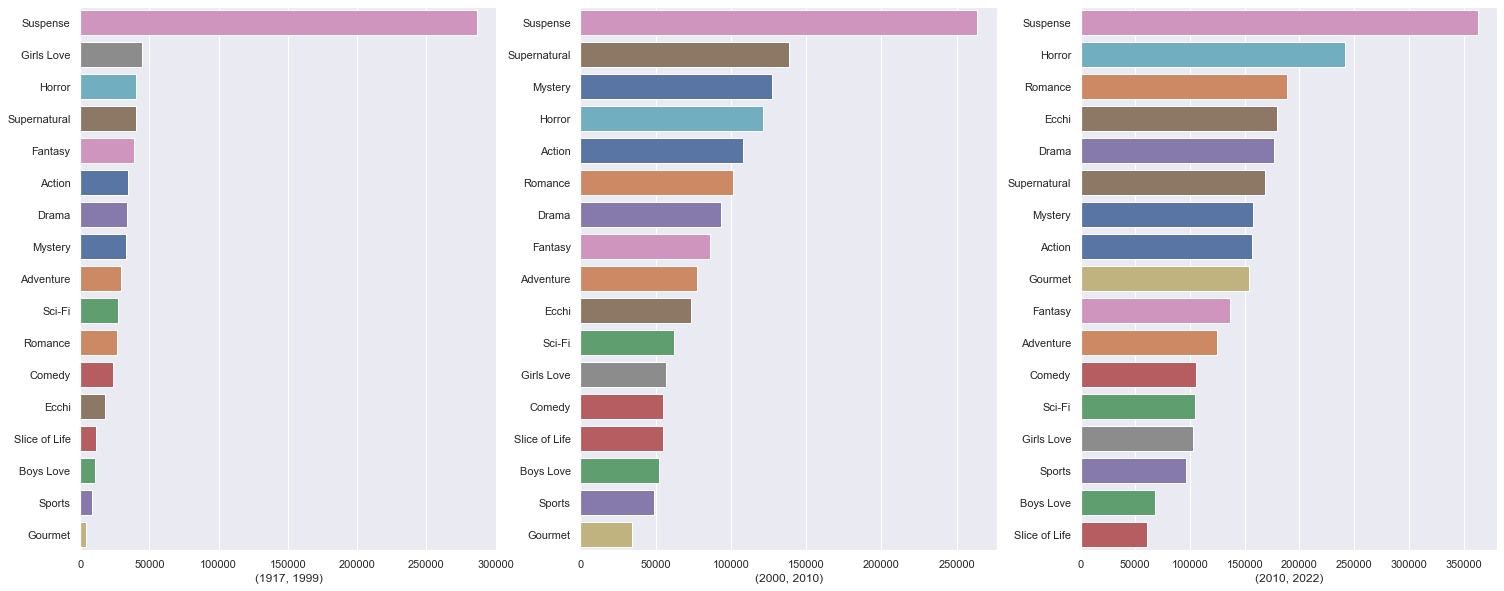

In [ ]:
genres_df['Palette']=sns.color_palette(n_colors=len(genres_df))
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(25.4,10))
axis=[ax1,ax2,ax3]
i=0
for col in genres_df.columns:
    if col == "Palette": continue
    genres_df.sort_values(by=[col],ascending=False,inplace=True)
    genres=genres_df.index
    # plt.subplots(figsize=(12,6))
    sns.barplot(data=genres_df,
                x=col,
                y=genres,
                ax=axis[i],
                palette=genres_df['Palette'])
    axis[i].set_ylabel("")
    i=i+1

Từ hình ảnh được trực quan hóa trên, ta thấy có sự thay đổi về thể loại yêu thích của người xem đối với phim anime, cụ thể là:
- Điểm chung: Thể loại phim suspense giữ vững vị trí top đầu sau cả 1 giai đoạn dài, đặc biệt là ở giai đoạn trước 2000, thể loại phim này giành vị trí tuyệt đối cách rất xa với vị trí thứ 2. Nguyên nhân là lúc đó người xem chưa chấp nhận những thể loại khác và thể loại những phim hồi họp này được ưa chuộng
- Khác biệt: 
  - Có sự thay đổi vị trí của các thể loại phim khác => sự thay đổi về yêu cầu của người dùng
  - Các thể loại khác vị trí thứ 1 đang được chấp nhận và mở rộng ra, cách biệt không còn quá lớn.

### Câu hỏi 4: Thời kì nào là thời kì hoàng kim của anime?

Anime chưa kết thúc, điền tạm ngày hiện tại vào cột To

In [ ]:
today = np.datetime64(datetime.datetime.now())
df['To'] = np.where((df['Episodes'].isna()) & (
    df['To'].isna()), today, df['To'])

Lấy ra các năm được chiếu trên thị trường của các bộ phim

In [ ]:
df1 = df[['From', 'To']].copy().dropna()
df1['Year'] = df1.apply(lambda x: range(int(x['From'].year), int(x['To'].year)+1), axis=1)
df1 = df1.Year.apply(pd.Series).merge(df1, right_index=True, left_index=True)
df1 = df1.melt(id_vars=['Year', 'From', 'To'], value_name="Year_Split")
df1 = df1.drop(["variable", "Year", "From", "To"], axis=1).dropna()
df1

,Year_Split
0,2009.0
1,2022.0
2,2022.0
3,2011.0
4,2015.0
...,...
479944,2018.0
489566,2019.0
499188,2020.0
508810,2021.0


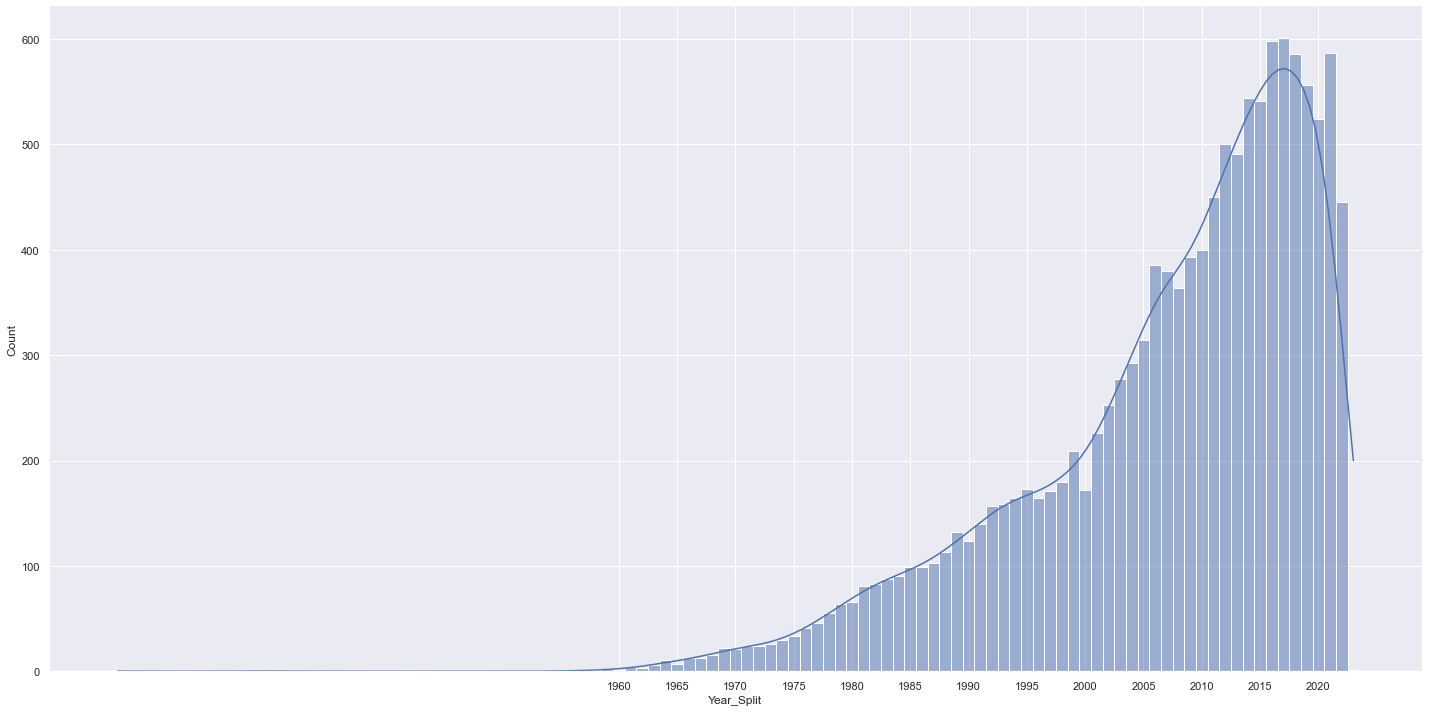

In [ ]:
g = sns.FacetGrid(df1, height=10, aspect=2)
g = g.map_dataframe(sns.histplot, x="Year_Split", kde=True, discrete=True)
g = g.set(xticks=np.arange(1960, 2022, 5))
g = g.add_legend()

***Nhận xét***\
Số lượng phim từ năm 1960 tới hiện tại có chiều hướng tăng lên nhưng đạt tới ngưỡng cao nhất lại là năm 2017 và ở hiện tại thì có xu hướng giảm những bộ phim được phát hành. Tới năm 2019 thì bắt đầu có dấu hiệu đi xuống do tác động của dịch covid 19

### Câu hỏi 5: Liệu mùa phát hành có ảnh hưởng tới số lượt xem các bộ anime không? Xét trong 10 năm trở lại đây, xem thử có sự biến động nào về lượt xem ở các mùa qua từng năm không?

In [ ]:
season_df = df[["Premiered","Members","From"]]
season_df["FromYear"] =  pd.DatetimeIndex(season_df['From']).year
season_df = season_df.dropna()
season_df["AverageMembers"] = season_df.apply(ave_mem, axis = 1)
season_df

,Premiered,Members,From,FromYear,AverageMembers
0,Spring,3037641,2009-04-05,2009.0,233664
1,Fall,310979,2022-10-11,2022.0,310979
2,Spring,703336,2022-04-09,2022.0,703336
3,Spring,2338343,2011-04-06,2011.0,212576
4,Spring,567213,2015-04-08,2015.0,81030
...,...,...,...,...,...
9987,Spring,36447,2020-04-05,2020.0,18223
9988,Spring,639,2019-04-02,2019.0,213
9990,Winter,1064,1982-02-13,1982.0,26
9991,Spring,954,1983-04-09,1983.0,24


In [ ]:
ten_nearest_years = max_year - 10
season_df = season_df.drop(season_df[season_df["FromYear"] < ten_nearest_years].index)
season_df

,Premiered,Members,From,FromYear,AverageMembers
1,Fall,310979,2022-10-11,2022.0,310979
2,Spring,703336,2022-04-09,2022.0,703336
4,Spring,567213,2015-04-08,2015.0,81030
5,Spring,1972472,2019-04-29,2019.0,657490
8,Fall,296566,2012-10-04,2012.0,29656
...,...,...,...,...,...
9976,Fall,5697,2021-10-03,2021.0,5697
9978,Winter,22989,2020-01-07,2020.0,11494
9987,Spring,36447,2020-04-05,2020.0,18223
9988,Spring,639,2019-04-02,2019.0,213


In [ ]:
season_mem = season_df.groupby(["FromYear","Premiered"])["AverageMembers"].sum()
temp=season_mem.to_frame()
temp

AverageMembers
FromYear Premiered                
2012.0   Fall              1515101
         Spring             881192
         Summer             737348
         Winter             741880
2013.0   Fall              1413645
         Spring            1215306
         Summer             876558
         Winter             544894
2014.0   Fall              2035039
         Spring            1827741
         Summer            1764871
         Winter            1032626
2015.0   Fall              1713544
         Spring            1998782
         Summer            1914499
         Winter            1598774
2016.0   Fall              1368230
         Spring            2319722
         Summer            2035358
         Winter            1871743
2017.0   Fall              1928579
         Spring            2323955
         Summer            2014147
         Winter            1864643
2018.0   Fall              2699919
         Spring            2701161
         Summer            2415297
         Winter            2900084
2019.0   Fall              3157693
         Spring            3739471
         Summer            3097718
         Winter            3775273
2020.0   Fall              4324465
         Spring            3278958
         Summer            3412036
         Winter            4399579
2021.0   Fall              6897483
         Spring           10588784
         Summer            6241586
         Winter           11687143
2022.0   Fall              5187909
         Spring            7143961
         Summer            5100282
         Winter            5004774

<AxesSubplot: xlabel='FromYear', ylabel='AverageMembers'>

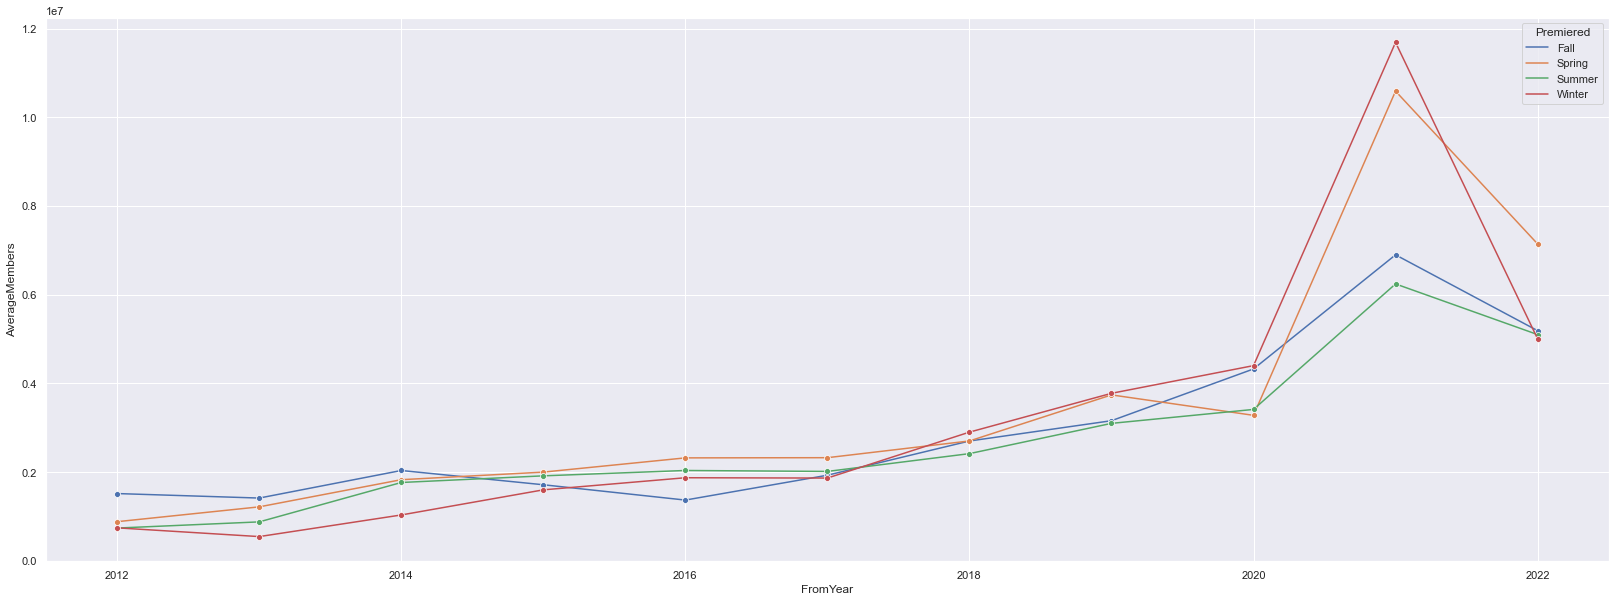

In [ ]:
fig,ax=plt.subplots(figsize=(28,10))
sns.lineplot(data = temp, x = temp.index.get_level_values('FromYear'),
             y = temp['AverageMembers'],
             hue = temp.index.get_level_values('Premiered'),
             marker = 'o')

**Nhận xét**\
Nhìn chung trung bình lượt xem qua các mùa là không quá cách biệt nhau và có thể thấy được là số lượng người xem qua từng năm có xu hướng tăng dần, đỉnh điểm là năm 2021, số lượng người xem tăng đột biến, đặc biệt là vào các mùa xuân và đông, điều này có thể là do đang trong đợt dịch covid nên số người ở nhà và xem anime ngày càng tăng, đặc biệt là 2 mùa xuân và đông là 2 mùa nghỉ lễ. 

### Câu hỏi 6: Thời điểm phát hành nội dung thích hợp trong năm?

In [ ]:
# Thoi diem phat hanh noi dung thich hop
df1 = df[['Name', 'From']].copy()
df1.dropna(inplace=True)
df1['Month'] = df1['From'].transform(lambda x: x.month_name())
df1['Year'] = df1['From'].transform(lambda x: x.year)
df1 = df1[df1['Year'] >= 2008]
# df1.sort_values(by=['Month'],inplace=True)
# df1['Month']=df1['From'].transform(lambda x: x.month_name())
df1 = df1.groupby(['Year', 'Month'])['Name'].count().unstack(level=0)
df1 = df1.reindex(['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December'])
df1 = df1.fillna(0)
df1

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Month,,,,,,,,,,,,,,,
January,35,35,32,33,47,40,60,52,61,58,67,56,72,67,64
February,15,13,13,20,19,14,23,14,22,25,17,23,24,28,28
March,23,17,29,34,32,32,41,29,36,30,33,29,22,29,38
April,55,56,47,61,60,54,69,63,68,84,83,64,65,75,70
May,4,11,9,18,11,12,12,15,24,28,20,19,21,19,14
June,11,20,14,23,21,21,23,23,25,17,25,30,19,25,21
July,36,28,45,51,52,63,63,68,67,68,74,61,49,86,67
August,18,25,19,17,25,26,26,18,25,25,30,30,25,32,24
September,18,13,18,22,28,23,29,22,34,36,25,25,25,28,17


Text(138.453125, 0.5, 'Month')

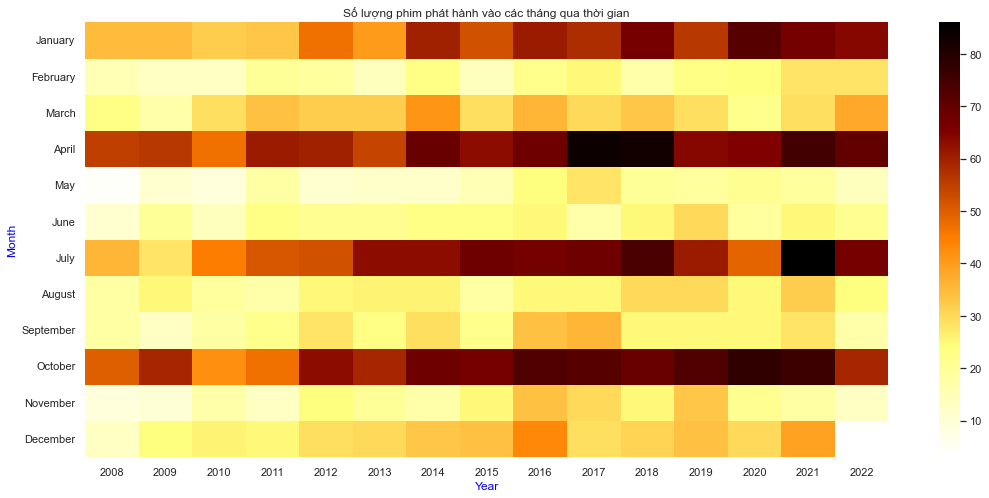

In [ ]:
plt.subplots(figsize=(18, 8))
sns.heatmap(data=df1,
            cmap='afmhot_r')
plt.title('Số lượng phim phát hành vào các tháng qua thời gian')
plt.xlabel('Year', color="blue")
plt.ylabel('Month', color="blue")

***Nhận xét***\
Nhìn vào Heat map hiển thị, thời điểm được các nhà phát hành phim yêu thích để tung ra những sản phẩn là tháng 1, tháng 4, tháng 7 và tháng 10. Đó là do đó là lúc phù hợp cho những dịp lễ hay kì nghỉ dài là lúc mà những tín đồ anime dành thời gian để "cày" những bộ phim mới phát hành.\
Ngoài ra nếu xét sâu hơn, các tháng này được phân bố đều trong năm để có thể giảm lượng cạnh tranh giữa các phim, không còn bị chỉ một thời điểm mà cho ra qua nhiều bộ được.\
Tuy nhiên nó cũng được phân bố ở các thời điểm nhát định để tăng độ nóng cho loạt những bộ phim ra mắt, vì nó được đưa ra vào một thời điểm mà không có những bộ phim làm sức nóng thì khó để tạo marketing hay độ khó nhằm nhân nhiệt cho phim

---

## Mô hình hóa dữ liệu

### Giới thiệu bài toán


MAL là một trang web phục vụ cho những người yêu thích anime, nó có một hệ thống chấm điểm cho từng anime dựa trên những đánh giá của người dùng về bộ anime đó. Dựa vào thông tin có được từ dữ liệu mà chúng em đã thu thập, mục tiêu trong việc mô hình hóa dữ liệu của chúng em chính là làm sao có thể đánh giá một bộ anime dựa vào số lượng người xem cũng như số lượng người yêu thích của nó. Qua đó ta có thể dựa vào những thông số được thống kê của các bộ anime mới để dự đoán chất lượng của chúng.

### Phân tích, lựa chọn các đặc trưng có mức độ liên quan cao, có tính quan trọng cho bài toán

Theo như tìm hiểu, công thức tính score trên MAL của từng anime liên quan đến rating của tất cả người dùng và số lượng người dùng đã xem bộ đó, do không thể biết được rating của từng người dùng như thế nào nên ta sẽ thử dự đoán score của nó thông qua các thông tin đã có được. Ta xét tới các đặc trưng sau:
- `Members`: Số lượng người xem, ta chọn đặc trưng này vì nó có liên quan đến tiêu chí tính điểm của MAL
- `Favorites`: Số lượng người yêu thích, vì không có cách nào biết được rating của người xem như nào nên ta sẽ đánh giá dựa trên số lượng người yêu thích, vì anime có càng nhiều người yêu thích thì khả năng cao là mức rating của nó cũng tăng lên
- `From`: Năm phát hành, vì có những bộ anime chỉ mới vừa ra mắt nên sẽ rất khó để đạt mức lượng người xem và lượng yêu thích vượt trội, thế điểm số của nó vẫn có thể đạt được top một cách dễ dàng, vậy nên ta chọn đặc trưng này để xét tới thời gian tồn tại của anime đó.

### Lựa chọn mô hình máy học

Vì bài toán là dự đoán `Score` của một bộ phim - dữ liệu dạng số nên cần sử dụng các model Regression. Cho bài toán này, nhóm chọn sử dụng 2 mô hình để sử dụng và so sánh là Linear Regression và K-Nearest-Neighbors Regression.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
# from sklearn.preprocessing import MultiLabelBinarizer,LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.metrics import r2_score

*Lấy ra các dữ liệu cần thiết và tiền xử lí*

In [ ]:
df1=df[['Score','Members','Favorites','From']]
df1['Years'] = df1['From'].dt.year
df1.drop(columns=['From'],inplace=True)
df1.dropna(inplace=True)
df1.head()

,Score,Members,Favorites,Years
0,9.11,3037641,211082,2009.0
1,9.10,310979,11798,2022.0
2,9.09,703336,25895,2022.0
3,9.08,2338343,177381,2011.0
4,9.07,567213,15323,2015.0


*Tách dữ liệu thành các tập huấn luyện (training) và kiểm thử (testing)*
- Mục đích: Nếu sử dụng cùng 1 tập dữ liệu cho cả traning và testing sẽ dẫn tới tình trạng như học thuộc lòng, khi đánh giá mô hình sẽ đạt được tỉ lệ chính xác rất cao, có thể lên đến 100% dẫn đến over fitting.
- Vì thế, chúng ta cần chia tập dữ liệu ban đầu thành 2 tập riêng biệt cho việc training và testing. Ở đây nhóm sẽ chia như sau:
    + Traning set : 80% dữ liệu
    + Testing set : 20% dữ liệu

In [ ]:
X=df1.drop(columns=['Score'])
y=df1['Score']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

**Linear Regression**

- Phân tích hồi quy tuyến tính là một phương pháp phân tích quan hệ giữa biến phụ thuộc Y với một hay nhiều biến độc lập X. Mô hình hóa sử dụng hàm tuyến tính (bậc 1). Các tham số của mô hình (hay hàm số) được ước lượng từ dữ liệu.

- Hồi quy tuyến tính được sử dụng rộng rãi trong thực tế do tính chất đơn giản hóa của hồi quy. Nó cũng dễ ước lượng.

In [ ]:
# Linear Regression
# <lý thuyết tóm tắt linear Regression> (wiki)

linearModel=Pipeline([('model',LinearRegression())])
# linearModel = LinearRegression().fit(X_train, y_train)
linearModel.fit(X_train, y_train)  
predictions = linearModel.predict(X_test)

*Kết quả dự đoán của mô hình Linear Regression so với thực tế*

Text(0, 0.5, 'Predict')

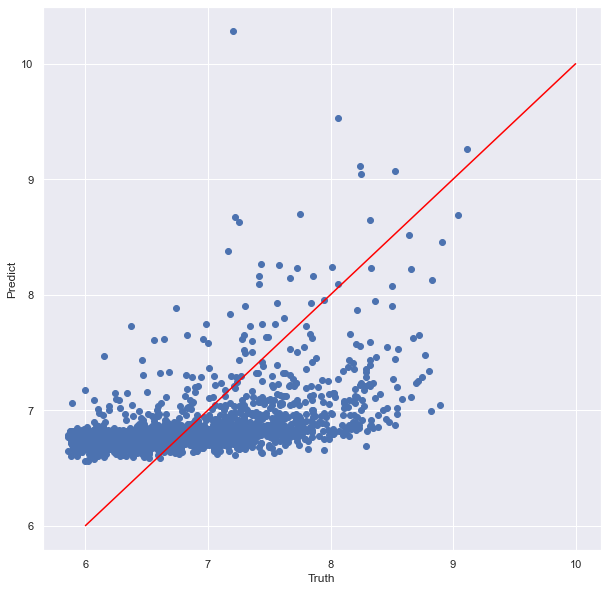

In [ ]:
# Visualize kết quả dữ đoán và kết quả thật sự

plt.figure(figsize=(10, 10))
plt.scatter(y_test, predictions)
plt.plot([6,10],[6,10],color="red")
plt.xlabel("Truth")
plt.ylabel("Predict")
# plt.xlim(5.5,10)
# plt.ylim(5.5,10)

Dễ thấy các điểm được vẽ có xu hướng cũng tập trung gần đường chéo, chứng tỏ việc sử dụng mô hình là phần nào dự đoán gần đúng số điểm của các bộ anime, tuy không hoàn toàn chính xác nhưng kết quả vẫn có thể chấp nhận được. Ta cùng thử đi tính độ lỗi bằng MSE để xem hiệu suất của mô hình ra sao.

*Độ lỗi đo bằng MSE*

In [ ]:
loss_linear = mean_squared_error(y_test,predictions)
loss_linear

0.33208931800957486

Độ lỗi nhìn chung có vẻ thấp, có thể thấy đây là một mô hình tương đối tốt.

**K Nearest Neightbors Regression**

- Trong thống kê, giải thuật k hàng xóm gần nhất (hay còn gọi là thuật toán k hàng xóm gần nhất, viết tắt từ tiếng Anh k-NN) là một phương pháp thống kê phi tham số (nonparametric statistics) được đề xuất bởi Thomas M. Cover để sử dụng cho phân loại bằng thống kê và `phân tích hồi quy`. Cụm từ hàng xóm có thể hiểu là láng giềng hoặc lân cận.
- Trong cả hai trường hợp, đầu vào chứa các ví dụ huấn luyện k gần nhất trong không gian thuộc tính (feature space). Đầu ra phụ thuộc vào việc k-NN được dùng cho phân loại hay cho hồi quy (ở đây ta chỉ chú ý đến hồi quy)
- Trong hồi quy k-NN, đầu ra là một giá trị thuộc tính của đối tượng. Giá trị là giá trị trung bình của các giá trị hàng xóm k gần nhất.

*Mô hình k-NN cần được cung cấp tham số k (số hàng xóm gần nhất)*\
Để bắt đầu, ta sẽ sử dụng tham số mặc định của `sklearn` cho k là `5`

In [ ]:
knnModel = Pipeline([('model',KNeighborsRegressor())])
knnModel.fit(X_train,y_train)
knn_predictions=knnModel.predict(X_test)

*Kết quả dự đoán của mô hình k-NN so với thực tế*

Text(0, 0.5, 'Predict')

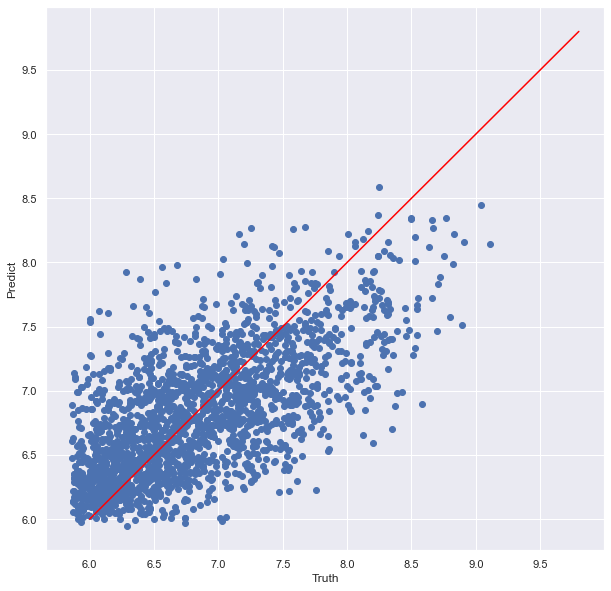

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(np.arange(6,10,0.2),np.arange(6,10,0.2),color='red')
plt.scatter(y_test, knn_predictions)
plt.xlabel("Truth")
plt.ylabel("Predict")

Dễ thấy được là so với mô hình hồi quy tuyến tính trước, mô hình lần này có vẻ thể hiện tốt hơn khi mà các điểm hầu như là rất gần với đường chéo. Ta cùng tính thử độ lỗi MSE để so sánh với mô hình trước xem sao.

*Độ lỗi đo bằng MSE*

In [ ]:
loss_knn_default = mean_squared_error(y_test,knn_predictions)
loss_knn_default

0.24744741799999997

Ta có thể thấy độ lỗi của mô hình hồi quy KNN (k = 5) thấp hơn mô hình hồi quy tuyến tính

*Do các trường dữ liệu đầu vào ở các thang đo và đơn vị khác nhau nên sẽ ảnh hưởng đến khoảng cách xa gần của các điểm dữ liệu mà mô hình KNN lại phụ thuộc vào khoảng cách này để dự đoán. Vì vậy các trường dữ liệu cần được chuyển đổi về một khoảng giá trị phù hợp hơn để đưa vào mô hình bằng `Feature Scaling`*

*Feature Scaling*
- Có 3 phương pháp chính là:
    + Standardisation: Làm cho tập dữ liệu có trung bình là 0 và độ lệch chuẩn là 1 và được áp dụng cho hầu hết các trường hợp cần feature scaling.
    + Normalisation: Làm cho các giá trị trong tập dữ liệu thuộc đoạn [0, 1] và được áp dụng nếu tập dữ liệu tuân theo phân phối chuẩn.
    + MinMax Scaler: Đưa các giá trị về khoảng giữa 2 giá trị min và max trong miền giá trị của thuộc tính, có thể là đoạn [-1, 0], [0, 1], [-1, 1],...
- Trong bài này nhóm chọn phương pháp Standardisation để scaling khoảng giá trị của thuộc tính.

In [ ]:
knnModel = Pipeline([('scaler',StandardScaler()),('model',KNeighborsRegressor())])
knnModel.fit(X_train,y_train)
knn_predictions=knnModel.predict(X_test)

*Kết quả dự đoán của mô hình k-NN sau khi Feature Scaling so với thực tế*

Text(0, 0.5, 'Predict')

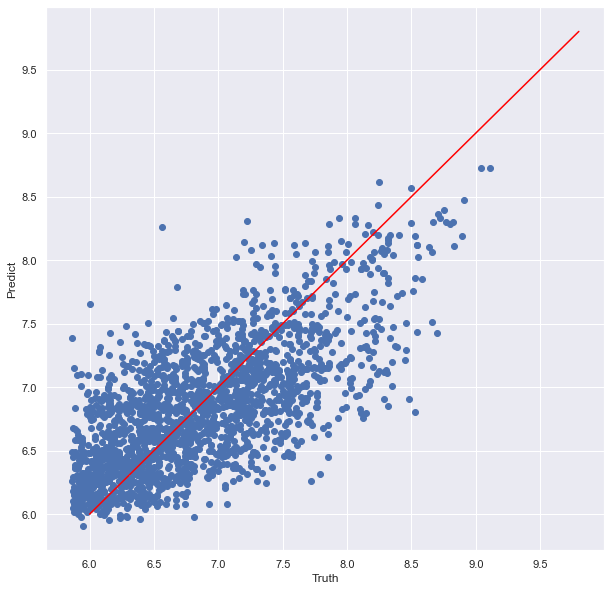

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(np.arange(6,10,0.2),np.arange(6,10,0.2),color='red')
plt.scatter(y_test, knn_predictions)
plt.xlabel("Truth")
plt.ylabel("Predict")

*Độ lỗi đo bằng MSE*

In [ ]:
loss_knn_standard = mean_squared_error(y_test,knn_predictions)
loss_knn_standard

0.22006279199999998

*Nhận xét*\
Sau khi thực hiện Feature Scaling độ lỗi MSE đã giảm

*Tinh chỉnh tham số*
- Ban đầu ta sử dụng k-NN với đầu vào k=5 nhưng chưa chắc k=5 thì mô hình có độ lỗi thấp nhất
- Để xác định tham số k tốt nhất cho model, nhóm sử dụng class `GridSearchCV` và kĩ thuật `cross-validation` có sẵn trong thư viện sklearn:
    + Thực hiện cross-validation với cách chia bộ dữ liệu thành 5 phần, mục tiêu để đánh giá các tham số k trong nhiều trường hợp để tổng quát hơn kết quả đánh giá
    + Xét k trong khoảng [1, 50] và chọn ra giá trị k có điểm đánh giá cao nhất

*Xây dựng hàm tính điểm để đánh giá*
- Ở đây, nhóm sẽ đánh giá theo độ lỗi MSE
- Vì độ lỗi càng thấp thì model càng hiệu quả nên điểm sẽ được tính bằng: -MSE

In [ ]:
def mse_score(y_true,y_predict):
    return -mean_squared_error(y_true,y_predict)

*Xây dựng mô hình đánh giá tham số k*

In [ ]:
knnModel = Pipeline([('scaler',StandardScaler()),('model',KNeighborsRegressor())])
mod=GridSearchCV(estimator=knnModel,
                param_grid={'model__n_neighbors':np.arange(1,50)},
                scoring={'mse':make_scorer(mse_score)},
                refit='mse',
                cv=5)
mod.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             refit='mse', scoring={'mse': make_scorer(mse_score)})

*Điểm đánh giá của từng giá trị k*

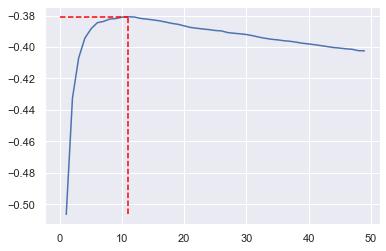

In [ ]:
# plt.figure(figsize=(12, 12))
df_result=pd.DataFrame(mod.cv_results_)
plt.plot(df_result['param_model__n_neighbors'],
        df_result['mean_test_mse'])
best_index=list(df_result['param_model__n_neighbors']).index(mod.best_params_['model__n_neighbors'])
best=(
        list(df_result['param_model__n_neighbors'])[best_index],
        list(df_result['mean_test_mse'])[best_index]
)
plt.plot([best[0],best[0]],[df_result['mean_test_mse'].min(),best[1]],
        linestyle='dashed',color='red')
plt.plot([0,best[0]],[best[1],best[1]],
        linestyle='dashed',color='red')

*Tham số k có điểm đánh giá cao nhất*

In [ ]:
mod.best_params_

{'model__n_neighbors': 11}

*Mô hình k-NN với tham số k tốt nhất*

In [ ]:
knnModel1 = Pipeline([('scaler',StandardScaler()),('model',
                                KNeighborsRegressor(n_neighbors=mod.best_params_['model__n_neighbors']))])
knnModel1.fit(X_train,y_train)
knn_predictions=knnModel1.predict(X_test)

*Kết quả dự đoán của mô hình k-NN sau khi tinh chỉnh tham số k so với thực tế*

Text(0, 0.5, 'Predict')

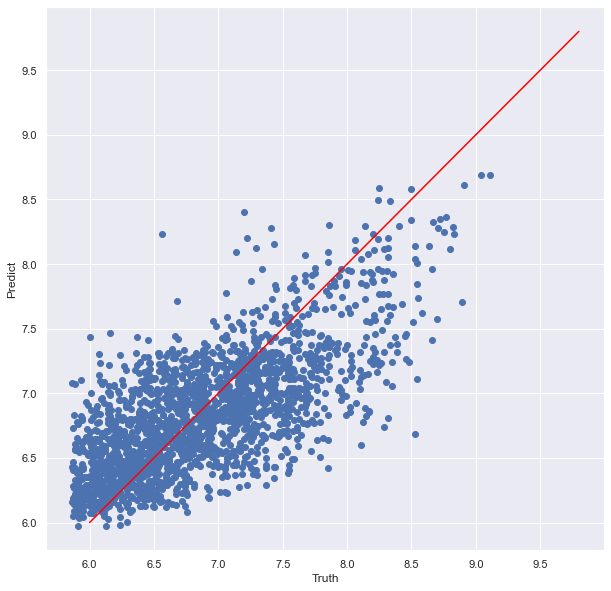

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(np.arange(6,10,0.2),np.arange(6,10,0.2),color='red')
plt.scatter(y_test, knn_predictions)
plt.xlabel("Truth")
plt.ylabel("Predict")

*Độ lỗi đo bằng MSE*

In [ ]:
loss = mean_squared_error(y_test, knn_predictions)
loss

0.20917376487603304

**Nhận xét**

Nhìn chung, hai mô hình làm việc khá tốt đối với tập dữ liệu này với, được thể hiện ở độ lỗi khi cả hai đều cho ra độ lỗi khá thấp (0.3 đối với Hồi quy tuyến tính và 0.2 đối với Hồi quy KNN). 

**So sánh 2 mô hình**

Dễ dàng thấy là mô hình KNN thể hiện độ chính xác có phần nhỉnh hơn một chút so với mô hình hồi quy tuyến tính

---

# THE END